### C√°c th∆∞ vi·ªán

In [19]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

### ƒê·ªçc file

In [20]:
# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("C:/Users/ADMIN/python/PPNC/Data/DATASET_state_weather_aqi_data_PPNC.csv")

### ƒê·ªãnh nghƒ©a h√†m t√≠nh RMSLE

In [21]:
# ƒê·ªãnh nghƒ©a h√†m t√≠nh RMSLE
def rmsle(real, predicted):
    sum = 0.0
    real = np.ravel(real) if hasattr(real, 'shape') and len(real.shape) > 1 else real
    predicted = np.ravel(predicted) if hasattr(predicted, 'shape') and len(predicted.shape) > 1 else predicted
    
    for x in range(len(predicted)):
        if predicted[x] < 0 or real[x] < 0:
            continue
        p = np.log(predicted[x] + 1)
        r = np.log(real[x] + 1)
        sum = sum + (p - r) ** 2
    return (sum / len(predicted)) ** 0.5

### X√°c ƒë·ªãnh c·ªôt v√† gi√° tr·ªã

In [22]:
# X√°c ƒë·ªãnh c√°c c·ªôt c·∫ßn d√πng
categorical_features = ['City', 'district']  # ƒê·∫∑c tr∆∞ng ph√¢n lo·∫°i
numerical_features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']  # ƒê·∫∑c tr∆∞ng s·ªë
target = 'AQI'

# Ki·ªÉm tra gi√° tr·ªã NaN trong c√°c c·ªôt c·∫ßn thi·∫øt
all_features = categorical_features + numerical_features + [target]
print("\nS·ªë l∆∞·ª£ng gi√° tr·ªã NaN trong c√°c c·ªôt:")
print(df[all_features].isnull().sum())

# Lo·∫°i b·ªè c√°c d√≤ng c√≥ gi√° tr·ªã NaN trong c√°c c·ªôt c·∫ßn thi·∫øt
df_clean = df.dropna(subset=all_features)
print(f"\nS·ªë l∆∞·ª£ng d√≤ng sau khi lo·∫°i b·ªè NaN: {len(df_clean)}")

# One-hot encoding cho c√°c ƒë·∫∑c tr∆∞ng ph√¢n lo·∫°i
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_data = ohe.fit_transform(df_clean[categorical_features])
categorical_df = pd.DataFrame(
    categorical_data, 
    columns=ohe.get_feature_names_out(categorical_features)
)

# K·∫øt h·ª£p c√°c ƒë·∫∑c tr∆∞ng ƒë√£ m√£ h√≥a v√† ƒë·∫∑c tr∆∞ng s·ªë
feature_set = pd.concat([categorical_df.reset_index(drop=True), 
                         df_clean[numerical_features].reset_index(drop=True)], axis=1)
y = df_clean[target].values

print(f"K√≠ch th∆∞·ªõc feature_set: {feature_set.shape}")
print(f"K√≠ch th∆∞·ªõc y: {y.shape}")



S·ªë l∆∞·ª£ng gi√° tr·ªã NaN trong c√°c c·ªôt:
City          0
district      0
PM2.5       173
PM10        337
NO2         155
NH3         444
SO2         213
CO           63
OZONE       149
AQI           0
dtype: int64

S·ªë l∆∞·ª£ng d√≤ng sau khi lo·∫°i b·ªè NaN: 966
K√≠ch th∆∞·ªõc feature_set: (966, 24)
K√≠ch th∆∞·ªõc y: (966,)


## PH·∫¶N 1: ƒê√°nh gi√° m√¥ h√¨nh KNN d·ª±a tr√™n AQI

In [23]:
# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(feature_set, y, test_size=0.2, random_state=0)

In [24]:
# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh SVR
print("\nHu·∫•n luy·ªán m√¥ h√¨nh KNN...")# Chu·∫©n h√≥a d·ªØ li·ªáu
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Kh·ªüi t·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh KNN
knn_reg = KNeighborsRegressor(n_neighbors=6)  # b·∫°n c√≥ th·ªÉ ƒëi·ªÅu ch·ªânh s·ªë l∆∞·ª£ng l√°ng gi·ªÅng k
knn_reg.fit(X_train_scaled, y_train_scaled)

# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
X_test_scaled = sc_X.transform(X_test)
y_pred_scaled = knn_reg.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# D·ª± ƒëo√°n tr√™n t·∫≠p hu·∫•n luy·ªán (n·∫øu mu·ªën ƒë√°nh gi√°)
y_train_pred_scaled = knn_reg.predict(X_train_scaled)
y_train_pred = sc_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1))



Hu·∫•n luy·ªán m√¥ h√¨nh KNN...


In [25]:
# ƒê√°nh gi√° tr√™n t·∫≠p hu·∫•n luy·ªán
knn_ytp_r2 = float(r2_score(y_train, y_train_pred))
knn_ytp_rmse = float(sqrt(mean_squared_error(y_train, y_train_pred)))
knn_ytp_mae = float(mean_absolute_error(y_train, y_train_pred))
knn_ytp_rmsle = float(rmsle(y_train, y_train_pred))
knn_ytp_mse = float(mean_squared_error(y_train, y_train_pred))

# ƒê√°nh gi√° tr√™n t·∫≠p ki·ªÉm tra
r2_knn = float(r2_score(y_test, y_pred))
rmse_knn = float(sqrt(mean_squared_error(y_test, y_pred)))
mae_knn = float(mean_absolute_error(y_test, y_pred))
rmsle_knn = float(rmsle(y_test, y_pred))
mse_knn = float(mean_squared_error(y_test, y_pred))

In [26]:
print("\nƒê√°nh gi√° tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán:")
print("---------------------------------")
print("M√¥ h√¨nh\tR^2\tRMSE\tMAE\tRMSLE\tMSE")
print("KNN\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\t{4:.4f}".format(knn_ytp_r2, knn_ytp_rmse, knn_ytp_mae, knn_ytp_rmsle, knn_ytp_mse))

print("\nƒê√°nh gi√° tr√™n d·ªØ li·ªáu ki·ªÉm tra:")
print("---------------------------------")
print("M√¥ h√¨nh\tR^2\tRMSE\tMAE\tRMSLE\tMSE")
print("KNN\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\t{4:.4f}".format(r2_knn, rmse_knn, mae_knn, rmsle_knn, mse_knn))



ƒê√°nh gi√° tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán:
---------------------------------
M√¥ h√¨nh	R^2	RMSE	MAE	RMSLE	MSE
KNN	0.8962	31.6414	24.5522	0.2065	1001.1804

ƒê√°nh gi√° tr√™n d·ªØ li·ªáu ki·ªÉm tra:
---------------------------------
M√¥ h√¨nh	R^2	RMSE	MAE	RMSLE	MSE
KNN	0.8536	35.6933	28.0009	0.2425	1274.0105


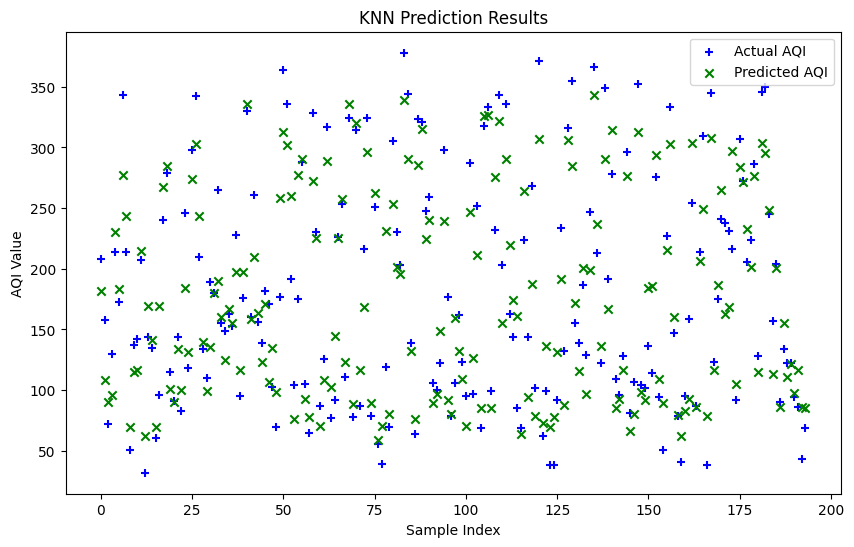

In [27]:
# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh gi√° tr·ªã th·ª±c v√† d·ª± ƒëo√°n
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(y_pred)), y_pred, c='green', marker='x', label='Predicted AQI')
plt.xlabel('Sample Index')
plt.ylabel('AQI Value')
plt.title('KNN Prediction Results')
plt.legend()
plt.savefig('knn_prediction_results.png', dpi=300)
plt.show()

## PH·∫¶N 2: ƒê√°nh gi√° m√¥ h√¨nh KNN d·ª±a tr√™n c√°c ch·ªâ s·ªë R2, RMSE, MAE, RMLE

In [28]:
# Kh·ªüi t·∫°o danh s√°ch l∆∞u k·∫øt qu·∫£
r2_list = []
rmse_list = []
mae_list = []
mse_list = []
rmsle_list = []


In [29]:
print("\nHu·∫•n luy·ªán m√¥ h√¨nh KNN 20 l·∫ßn...")
for i in range(20):
    print(f"V√≤ng {i+1}/20...")

    # Chia d·ªØ li·ªáu
    X_train, X_test, y_train, y_test = train_test_split(feature_set, y, test_size=0.2, random_state=i)

    # Chu·∫©n h√≥a
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_train_scaled = sc_X.fit_transform(X_train)
    y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

    # Hu·∫•n luy·ªán m√¥ h√¨nh KNN
    knn_reg = KNeighborsRegressor(n_neighbors=6)  # c√≥ th·ªÉ thay ƒë·ªïi n_neighbors n·∫øu mu·ªën
    knn_reg.fit(X_train_scaled, y_train_scaled)

    # D·ª± ƒëo√°n v√† inverse_transform
    X_test_scaled = sc_X.transform(X_test)
    y_pred_scaled = knn_reg.predict(X_test_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # ƒê√°nh gi√°
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmsle_val = rmsle(y_test, y_pred)

    # L∆∞u k·∫øt qu·∫£
    r2_list.append(r2)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mse_list.append(mse)
    rmsle_list.append(rmsle_val)


Hu·∫•n luy·ªán m√¥ h√¨nh KNN 20 l·∫ßn...
V√≤ng 1/20...
V√≤ng 2/20...
V√≤ng 3/20...
V√≤ng 4/20...
V√≤ng 5/20...
V√≤ng 6/20...
V√≤ng 7/20...
V√≤ng 8/20...
V√≤ng 9/20...
V√≤ng 10/20...
V√≤ng 11/20...
V√≤ng 12/20...
V√≤ng 13/20...
V√≤ng 14/20...
V√≤ng 15/20...
V√≤ng 16/20...
V√≤ng 17/20...
V√≤ng 18/20...
V√≤ng 19/20...
V√≤ng 20/20...


In [30]:
# T·∫°o DataFrame l∆∞u t·∫•t c·∫£ k·∫øt qu·∫£
results_df = pd.DataFrame({
    'Round': list(range(1, 21)),
    'R2': r2_list,
    'RMSE': rmse_list,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSLE': rmsle_list
})

In [31]:
# In gi√° tr·ªã trung b√¨nh c·ªßa c√°c ch·ªâ s·ªë
print("\nK·∫øt qu·∫£ trung b√¨nh sau 20 v√≤ng:")
print(f"R2 trung b√¨nh: {results_df['R2'].mean():.4f}")
print(f"RMSE trung b√¨nh: {results_df['RMSE'].mean():.4f}")
print(f"MAE trung b√¨nh: {results_df['MAE'].mean():.4f}")
print(f"MSE trung b√¨nh: {results_df['MSE'].mean():.4f}")
print(f"RMSLE trung b√¨nh: {float(results_df['RMSLE'].mean()):.4f}")


K·∫øt qu·∫£ trung b√¨nh sau 20 v√≤ng:
R2 trung b√¨nh: 0.8590
RMSE trung b√¨nh: 36.5961
MAE trung b√¨nh: 28.7757
MSE trung b√¨nh: 1345.4435
RMSLE trung b√¨nh: 0.2482


In [32]:
# Xu·∫•t k·∫øt qu·∫£ ra file CSV
results_df.to_csv('results_metrics_svr.csv', index=False)

### KNN regression model

ƒê√£ l∆∞u bi·ªÉu ƒë·ªì v√†o file 'metrics_per_round_svr.png'


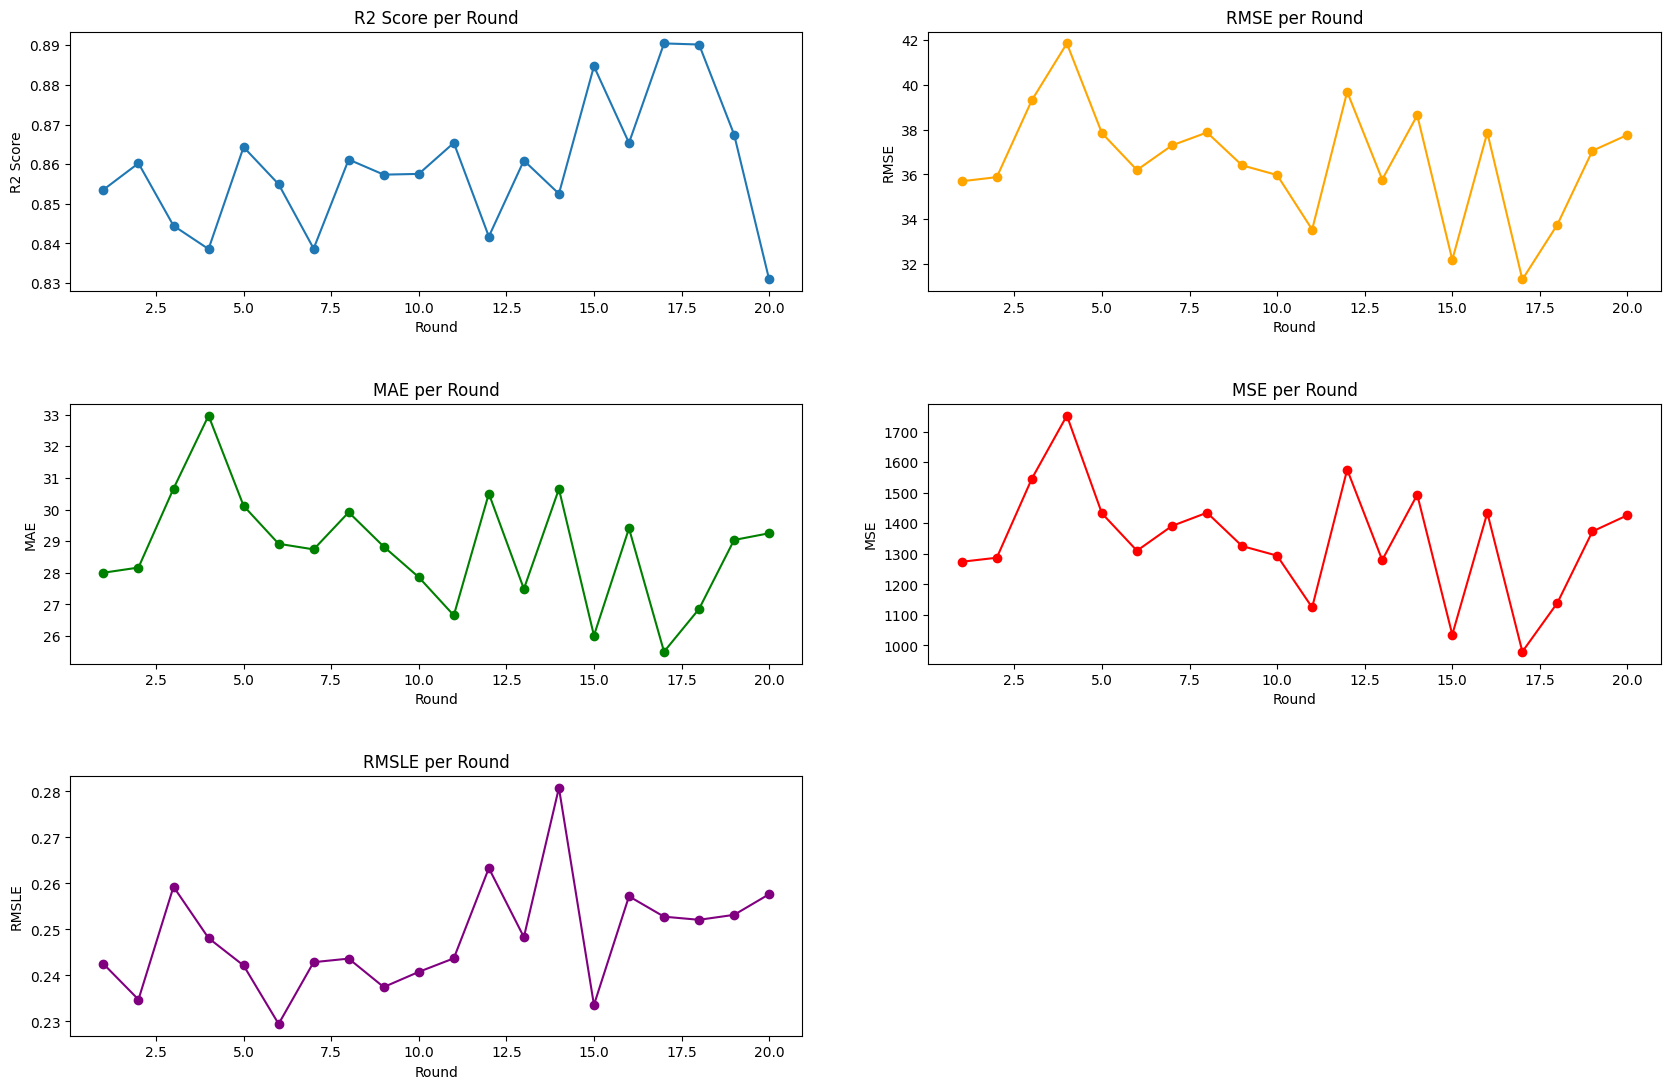

In [33]:
# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£ qua 20 v√≤ng
fig, axs = plt.subplots(3, 2, figsize=(18, 12))
fig.tight_layout(pad=6)

# R2
axs[0, 0].plot(results_df['Round'], results_df['R2'], marker='o')
axs[0, 0].set_title('R2 Score per Round')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('R2 Score')

# RMSE
axs[0, 1].plot(results_df['Round'], results_df['RMSE'], marker='o', color='orange')
axs[0, 1].set_title('RMSE per Round')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('RMSE')

# MAE
axs[1, 0].plot(results_df['Round'], results_df['MAE'], marker='o', color='green')
axs[1, 0].set_title('MAE per Round')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('MAE')

# MSE
axs[1, 1].plot(results_df['Round'], results_df['MSE'], marker='o', color='red')
axs[1, 1].set_title('MSE per Round')
axs[1, 1].set_xlabel('Round')
axs[1, 1].set_ylabel('MSE')

# RMSLE
axs[2, 0].plot(results_df['Round'], results_df['RMSLE'], marker='o', color='purple')
axs[2, 0].set_title('RMSLE per Round')
axs[2, 0].set_xlabel('Round')
axs[2, 0].set_ylabel('RMSLE')

# X√≥a √¥ tr·ªëng d∆∞ th·ª´a (v√¨ 3x2 = 6, nh∆∞ng ta ch·ªâ c·∫ßn 5 bi·ªÉu ƒë·ªì)
fig.delaxes(axs[2, 1])

# L∆∞u ·∫£nh
plt.savefig('metrics_per_round_svr.png', dpi=300)
print("ƒê√£ l∆∞u bi·ªÉu ƒë·ªì v√†o file 'metrics_per_round_svr.png'")
plt.show()

### 1. ∆Øu ƒëi·ªÉm c·ªßa KNN Regression
üîπ Kh√¥ng gi·∫£ ƒë·ªãnh ph√¢n ph·ªëi d·ªØ li·ªáu KNN kh√¥ng y√™u c·∫ßu gi·∫£ ƒë·ªãnh tuy·∫øn t√≠nh ho·∫∑c ph√¢n ph·ªëi chu·∫©n.  
üîπ D·ªÖ hi·ªÉu v√† tr·ª±c quan KNN d·ª±a v√†o kho·∫£ng c√°ch ‚Äì d·ªÖ gi·∫£i th√≠ch m√¥ h√¨nh.  
üîπ Hi·ªáu qu·∫£ v·ªõi d·ªØ li·ªáu √≠t nhi·ªÖu v√† c√≥ c·∫•u tr√∫c g·∫ßn nhau N·∫øu d·ªØ li·ªáu ch·∫•t l∆∞·ª£ng t·ªët (nh∆∞ th·ªùi ti·∫øt v√† giao th√¥ng), KNN c√≥ th·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n kh√° ch√≠nh x√°c.  
üîπ K·∫øt qu·∫£ R¬≤ = 0.72 Ch·ª©ng t·ªè m√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c 72% ph∆∞∆°ng sai d·ªØ li·ªáu AQI, l√† kh√° ·ªïn cho b√†i to√°n m√¥i tr∆∞·ªùng th·ª±c t·∫ø.  
### 2. Nh∆∞·ª£c ƒëi·ªÉm c·ªßa m√¥ h√¨nh KNN Regression
üî∏ D·ªÖ b·ªã ·∫£nh h∆∞·ªüng b·ªüi nhi·ªÖu KNN r·∫•t nh·∫°y v·ªõi d·ªØ li·ªáu b·∫•t th∆∞·ªùng (outliers), ƒë·∫∑c bi·ªát l√† d·ªØ li·ªáu th·ªùi ti·∫øt c·ª±c ƒëoan.  
üî∏ Hi·ªáu nƒÉng gi·∫£m v·ªõi d·ªØ li·ªáu l·ªõn Khi s·ªë l∆∞·ª£ng m·∫´u tƒÉng, th·ªùi gian d·ª± ƒëo√°n tƒÉng nhanh v√¨ ph·∫£i t√≠nh kho·∫£ng c√°ch t·ªõi t·∫•t c·∫£ ƒëi·ªÉm.  
üî∏ Kh√¥ng h·ªçc ƒë∆∞·ª£c quy lu·∫≠t t·ªïng qu√°t V√¨ KNN kh√¥ng ‚Äúh·ªçc‚Äù h√†m n·ªôi t·∫°i m√† ch·ªâ "nh√¨n h√†ng x√≥m g·∫ßn nh·∫•t", n√™n kh√¥ng gi·ªèi trong vi·ªác d·ª± ƒëo√°n d√†i h·∫°n ho·∫∑c v·ªõi m·∫´u m·ªõi xa d·ªØ li·ªáu c≈©.  
üî∏ RMSE = 12.26 v√† MAE = 9.30 Ch√™nh l·ªách gi·ªØa RMSE v√† MAE cho th·∫•y c√≥ m·ªôt s·ªë l·ªói l·ªõn (outliers) ·∫£nh h∆∞·ªüng ƒë·∫øn RMSE.  
üî∏ RMSLE = 0.10 T·ªët v·ªõi d·ªØ li·ªáu log-scale, nh∆∞ng n·∫øu gi√° tr·ªã AQI g·∫ßn 0 ho·∫∑c √¢m (l·ªói d·ªØ li·ªáu) s·∫Ω g√¢y sai s·ªë.  